In this notebook, we'll build a machine learning model to predict churn at bunk, we'll use a dataset from kaggle (https://www.kaggle.com/datasets/barelydedicated/bank-customer-churn-modeling).
We'll follow theses steps :


*   Import Dependencies
*   Collect and clean data
*   Choose the best model for this problem
*   Train the model 
*   Evaluate the model
*   Improve the results by balancing the data







# Import dependencies
We'll import: 

*   numpy, pandas and matplotlib for data collection and data preprocessing.
*   MinMaxScaler to scale our data
*   train_test_split to split our data into train and test dataset, we'll fit the ML model with train data and evaluate it with the test data
*   Different ML algorithms to compare and choose the one with best results
*   classification_report to evaluate the ML algorithms






In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import classification_report

# Data collection and data cleaning
During this step, we'll read the data and preprocess it.

In [5]:
# Reading the data
path_to_data = '/content/Churn_Modelling.csv'
data = pd.read_csv(path_to_data)

# Shape of data
nrows = data.shape[0]
ncols = data.shape[1]
print(f'We\'ve {nrows} rows and {ncols} columns')

We've 10000 rows and 14 columns


In [6]:
# First 5 rows
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [7]:
# data columns
data.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [8]:
# drop unnecessary columns for our prediction model
data.drop(columns=['RowNumber', 'CustomerId', 'Surname'], inplace=True)

In [9]:
# print first 5 rows after dropping unnecessary columns
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [10]:
# check if there is null values
data.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [11]:
# Analyse the data
data.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [12]:
# Check the columns type
data.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [ ]:
# Convert categorical columns into numerical ones 
data.Gender.unique(), data.Geography.unique()

(array(['Female', 'Male'], dtype=object),
 array(['France', 'Spain', 'Germany'], dtype=object))

In [13]:
# Convert Gender column to numerical column
data.Gender.replace({'Female':0,'Male':1}, inplace=True)

# One hot encoding for other categorical columns
data = pd.get_dummies(data=data, columns=['Geography'])

In [14]:
# columns type after converting categorical columns into numerical ones 
data.dtypes

CreditScore            int64
Gender                 int64
Age                    int64
Tenure                 int64
Balance              float64
NumOfProducts          int64
HasCrCard              int64
IsActiveMember         int64
EstimatedSalary      float64
Exited                 int64
Geography_France       uint8
Geography_Germany      uint8
Geography_Spain        uint8
dtype: object

In [15]:
# print first 5 rows after converting categorical columns into numerical ones 
data.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,619,0,42,2,0.00,1,1,1,101348.88,1,1,0,0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,0,0,1
2,502,0,42,8,159660.80,3,1,0,113931.57,1,1,0,0
3,699,0,39,1,0.00,2,0,0,93826.63,0,1,0,0
4,850,0,43,2,125510.82,1,1,1,79084.10,0,0,0,1


In [18]:
# check how much the dataset is umbalanced
data.Exited.value_counts()
ratio = data.Exited.value_counts()[0]/data.Exited.value_counts()[1]
print(f'Not exited customers are {"{:.2f}".format(ratio)} more numerous than exited customers')

Not exited customers are 3.91 more numerous than exited customers


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3208: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).size
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


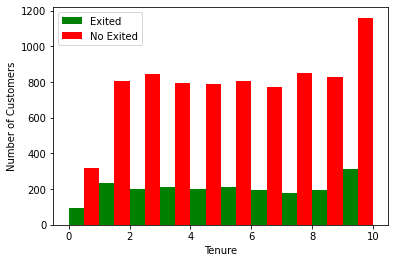

In [19]:
# Impact of Tenure in Customer Exiting the bunk
tenure_exited_customers = data.Tenure[data.Exited == 1]
tenure_notexited_customers = data.Tenure[data.Exited == 0]

plt.xlabel('Tenure')
plt.ylabel('Number of Customers')

plt.hist([tenure_exited_customers, tenure_notexited_customers], rwidth=1, color=['green','red'], label=['Exited', 'No Exited']);
plt.legend();

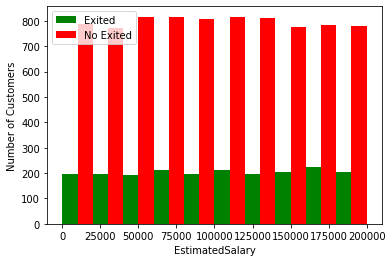

In [ ]:
# Impact of EstimatedSalary in Customer Exiting the bunk
EstimatedSalary_exited_customers = data.EstimatedSalary[data.Exited == 1]
EstimatedSalary_notexited_customers = data.EstimatedSalary[data.Exited == 0]

plt.xlabel('EstimatedSalary')
plt.ylabel('Number of Customers')

plt.hist([EstimatedSalary_exited_customers, EstimatedSalary_notexited_customers], rwidth=1, color=['green','red'], label=['Exited', 'No Exited']);
plt.legend();

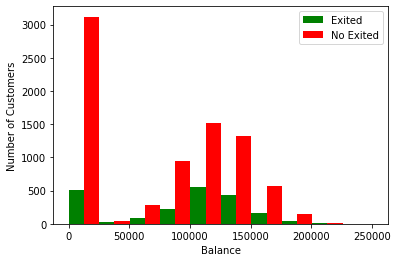

In [ ]:
# # Impact of Balance in Customer Exiting the bunk
Balance_exited_customers = data.Balance[data.Exited == 1]
Balance_nonexited_customers = data.Balance[data.Exited == 0]

plt.xlabel('Balance')
plt.ylabel('Number of Customers')

plt.hist([Balance_exited_customers, Balance_nonexited_customers], rwidth=1, color=['green','red'], label=['Exited', 'No Exited']);
plt.legend();

In [20]:
# Scaling of the data 
columns_to_scale = ['Balance','EstimatedSalary']
scaler = MinMaxScaler()
data[columns_to_scale] = scaler.fit_transform(data[columns_to_scale])

In [21]:
# Print the unique values for each column
for column in data.columns:
  print(f'{column} : {data[column].unique()}')

CreditScore : [619 608 502 699 850 645 822 376 501 684 528 497 476 549 635 616 653 587
 726 732 636 510 669 846 577 756 571 574 411 591 533 553 520 722 475 490
 804 582 472 465 556 834 660 776 829 637 550 698 585 788 655 601 656 725
 511 614 742 687 555 603 751 581 735 661 675 738 813 657 604 519 664 678
 757 416 665 777 543 506 493 652 750 729 646 647 808 524 769 730 515 773
 814 710 413 623 670 622 785 605 479 685 538 562 721 628 668 828 674 625
 432 770 758 795 686 789 589 461 584 579 663 682 793 691 485 650 754 535
 716 539 706 586 631 717 800 683 704 615 667 484 480 578 512 606 597 778
 514 525 715 580 807 521 759 516 711 618 643 671 689 620 676 572 695 592
 567 694 547 594 673 610 767 763 712 703 662 659 523 772 545 634 739 771
 681 544 696 766 727 693 557 531 498 651 791 733 811 707 714 782 775 799
 602 744 588 747 583 627 731 629 438 642 806 474 559 429 680 749 734 644
 626 649 805 718 840 630 654 762 568 613 522 737 648 443 640 540 460 593
 801 611 802 745 483 690 492 709 705 

In [22]:
# Split the data into X and Y (labels) data
X = data.drop(columns='Exited', axis=1)
Y = data['Exited']

In [23]:
# Shape of X and Y
X.shape, Y.shape

((10000, 12), (10000,))

# Model building
In this step we'll test many ML algorithms on the data prepared above (knowing that the dataset is **umbalanced**) and choose the best one.
ML algorithms to test:  

*   Logistic Regression
*   Linear Discriminant Analysis
*   k-nearest neighbors
*   DecisionTree
*   Gaussian Naïve Bayes
*   Support Vector Machine





## What is the best model for this task ?

In [24]:
# split the data into train and test data
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, shuffle=True, random_state=2)

In [25]:
# instantiate the ML models
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

In [26]:
# train the ML models 
for name, model in models:

  # train the model 
  model.fit(x_train, y_train)

  # Evaluate the model
  y_preds = model.predict(x_test)
  print(f'model :{model}')
  print("Classification Report: \n", classification_report(y_test, y_preds))
  print('-----------------------------------------------------------------------------')

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


model :LogisticRegression()
Classification Report: 
               precision    recall  f1-score   support

           0       0.83      0.96      0.89      1593
           1       0.58      0.20      0.30       407

    accuracy                           0.81      2000
   macro avg       0.70      0.58      0.59      2000
weighted avg       0.78      0.81      0.77      2000

-----------------------------------------------------------------------------
model :LinearDiscriminantAnalysis()
Classification Report: 
               precision    recall  f1-score   support

           0       0.83      0.95      0.88      1593
           1       0.54      0.22      0.32       407

    accuracy                           0.80      2000
   macro avg       0.68      0.59      0.60      2000
weighted avg       0.77      0.80      0.77      2000

-----------------------------------------------------------------------------
model :KNeighborsClassifier()
Classification Report: 
               precisi

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


The best model for this umbalanced dataset is DecisionTree Why ? Because it gives the highest values for precision, recall and f1-score for the class 1 which is the **Exited Class** (what we are most interested in) even if there is an unbalancing in the data as we have few samples with Class 1.

# Improving the results of DecisionTreeClassifier by applying techniques to the umbalanced dataset

## Undersampling

In [27]:
# Class count
count_class_0, count_class_1 = data.Exited.value_counts()
count_class_0, count_class_1

# Divide the data by class
data_class_0 = data[data['Exited'] == 0]
data_class_1 = data[data['Exited'] == 1]

# Pick n samples from the Class 0 (Not Exited Customers) with n = number of samples in class 1 (Exited Customers)
data_class_0_under = data_class_0.sample(count_class_1)

# concatenate the first and second class datasets
data_test_under = pd.concat([data_class_0_under, data_class_1], axis=0)

# We can see that the data is no more umbalanced
print(data_test_under.Exited.value_counts())

0    2037
1    2037
Name: Exited, dtype: int64


In [28]:
# split the data into X and Y data
X = data_test_under.drop('Exited',axis='columns')
Y = data_test_under.Exited

In [29]:
# split the data into train and test data
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, shuffle=True, random_state=2)

# Instanciate the model
model = DecisionTreeClassifier()

# train the model
model.fit(x_train, y_train)

# Evaluate the model
y_preds = model.predict(x_test)   
print("Classification Report: \n", classification_report(y_test, y_preds))

Classification Report: 
               precision    recall  f1-score   support

           0       0.70      0.70      0.70       408
           1       0.70      0.70      0.70       407

    accuracy                           0.70       815
   macro avg       0.70      0.70      0.70       815
weighted avg       0.70      0.70      0.70       815



## Oversampling

In [30]:
# Oversampling the first Class (Exited Class) by duplicating the sample in order to have n samples with n = number of Class 0 samples
data_class_1_over = data_class_1.sample(count_class_0, replace=True)

# concatenate the first and second class datasets
data_test_over = pd.concat([data_class_0, data_class_1_over], axis=0)

# We can see that the data is no more umbalanced
print(data_test_over.Exited.value_counts())

0    7963
1    7963
Name: Exited, dtype: int64


In [31]:
# split the data into X and Y data
X = data_test_over.drop('Exited',axis='columns')
Y = data_test_over.Exited

###  Model training

In [32]:
# split the data into train and test data
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, shuffle=True, random_state=2)

# Instanciate the model
model = DecisionTreeClassifier()

# train the model
model.fit(x_train, y_train)

# Evaluate the model
y_preds = model.predict(x_test)   
print("Classification Report: \n", classification_report(y_test, y_preds))

Classification Report: 
               precision    recall  f1-score   support

           0       0.98      0.85      0.91      1593
           1       0.87      0.98      0.92      1593

    accuracy                           0.92      3186
   macro avg       0.93      0.92      0.92      3186
weighted avg       0.93      0.92      0.92      3186



## SMOTE

In [33]:
# import smote function
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='minority')

X_sm, y_sm = smote.fit_resample(X, Y)

y_sm.value_counts()

0    7963
1    7963
Name: Exited, dtype: int64

In [34]:
# split the data into train and test data
x_train, x_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.2, random_state=15, stratify=y_sm)

# Instanciate the model
model = DecisionTreeClassifier()

# train the model
model.fit(x_train, y_train)

# Evaluate the model
y_preds = model.predict(x_test)   
print("Classification Report: \n", classification_report(y_test, y_preds))

Classification Report: 
               precision    recall  f1-score   support

           0       0.97      0.86      0.91      1593
           1       0.88      0.97      0.92      1593

    accuracy                           0.92      3186
   macro avg       0.92      0.92      0.92      3186
weighted avg       0.92      0.92      0.92      3186

